In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('diabetes_csv.csv')

# Question 02
## a).

In [3]:
data = pd.DataFrame({'x' :df['plas'], 'y': df['pres']})
data['x'] = data['x'].drop_duplicates()
data = data.dropna()
data = data.reset_index().drop('index', axis=1)
data

,x,y
0,148.0,72
1,85.0,66
2,183.0,64
3,89.0,66
4,137.0,40
...,...,...
131,56.0,56
132,169.0,74
133,149.0,68
134,65.0,72


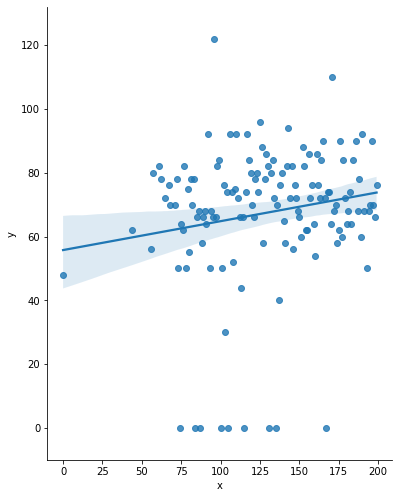

In [4]:
relation = sns.pairplot(data, x_vars='x', y_vars=['y'], height=7, aspect=0.8, kind='reg',diag_kind=None)
relation.set(xlim = (min(data['x'] - 10),max(data['x'] + 10)))
relation.set(ylim = (min(data['y'] - 10),max(data['y'] + 10)))

In [5]:
x = data.drop('y', axis=1)
y = data['y']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
lg = LinearRegression()
lg.fit(xtrain, ytrain)
ypred = lg.predict(xtest)

In [8]:
print('Mean Squared Error', mean_squared_error(ytest, ypred))

Mean Squared Error 443.3945950861812


## b).
#### Unsupervised Learning
Classification based on Preg, Plas, Pres, Skin, and Insu attributes

In [9]:
dataset = df.drop(['mass','pedi', 'age', 'class'], axis=1)

In [10]:
distortions = []
K = range(1,10)
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    distortions.append(km.inertia_)

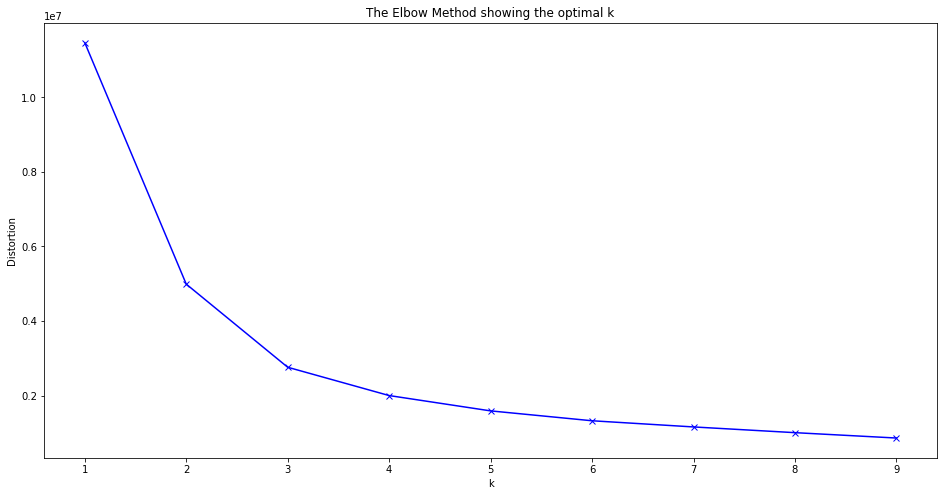

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
km = KMeans(n_clusters=3)
km.fit(dataset)
labels = km.predict(dataset)
centroids = km.cluster_centers_

In [13]:
colmap = {1:'green', 2: 'hotpink', 3:'orange'}
colors = list(map(lambda x:colmap[x+1], labels))

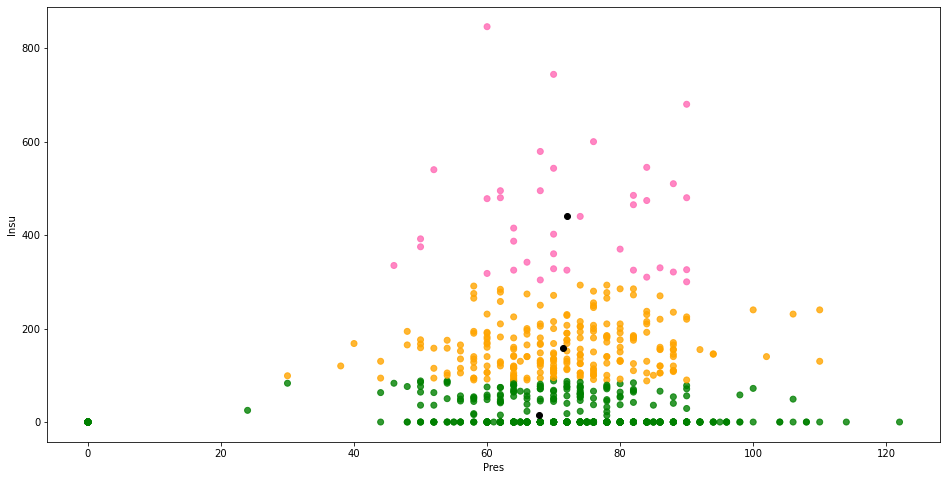

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(df['pres'], df['insu'], color=colors, alpha=0.8, edgecolor=colors)
for idx, centroid in enumerate(centroids):
    plt.scatter(centroid[2],centroid[-1], c = 'k')

plt.xlabel('Pres')
plt.ylabel('Insu')
plt.show()

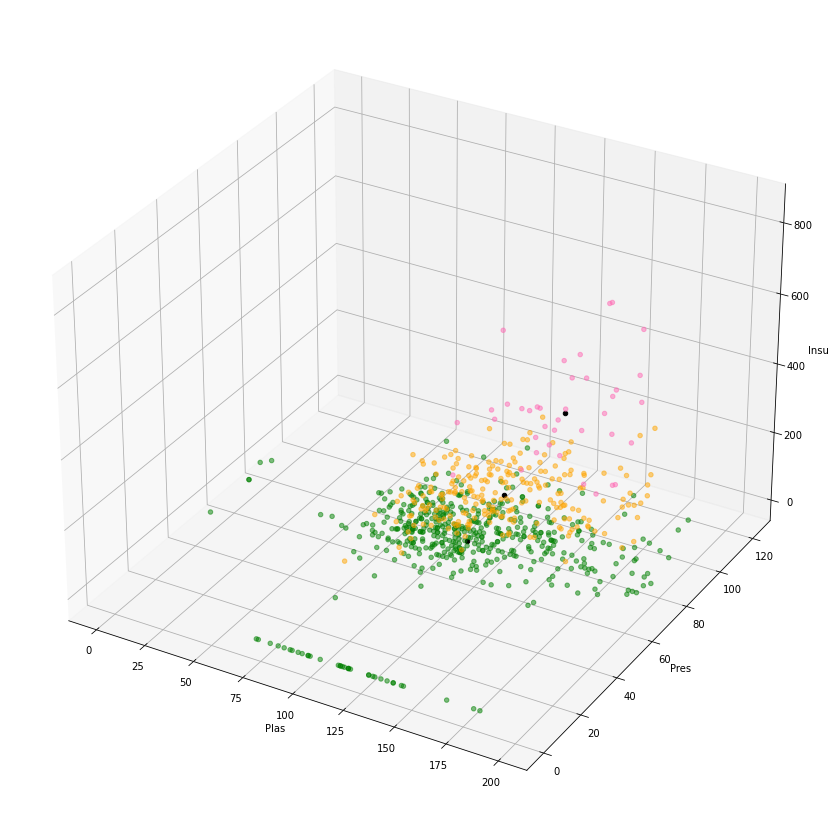

In [15]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
x,y,z = df['plas'], df['pres'], df['insu']
ax.scatter(x,y,z, c=colors, alpha=0.5)

for idx, centroid in enumerate(centroids):
    ax.scatter(centroid[1],centroid[2],centroid[-1], c = 'k')

ax.set_xlabel('Plas')
ax.set_ylabel('Pres');
ax.set_zlabel('Insu');

plt.show()